What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [1251]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_org = pd.read_csv("MasterCapStoneFile_01.csv" )
df_org_01 = pd.read_csv("MasterCapStoneFile_01A.csv" )


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
Note: you may need to restart the kernel to use updated

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~-8py.libs\\libopenblas-802f9ed1179cb9c9b03d67ff79f48187.dll'
Consider using the `--user` option or check the permissions.



In [1252]:
df_org .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HD_M_Value    27210 non-null  float64
 1   HD_M_US       27210 non-null  float64
 2   HD_M_REL_US   27210 non-null  float64
 3   HBP_M_Value   27210 non-null  float64
 4   HBP_M_US      27210 non-null  float64
 5   HBP_M_REL_US  27210 non-null  float64
 6   HC_M_Value    27210 non-null  float64
 7   HC_M_US       27210 non-null  float64
 8   HC_M_REL_US   27210 non-null  float64
 9   OB_M_Value    27210 non-null  float64
 10  OB_M_US       27210 non-null  float64
 11  OB_M_REL_US   27210 non-null  float64
 12  DB_M_Value    27210 non-null  float64
 13  DB_M_US       27210 non-null  float64
 14  DB_M_REL_US   27210 non-null  float64
 15  Target_Value  27210 non-null  float64
dtypes: float64(16)
memory usage: 3.3 MB


#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records

#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records

#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records


#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

In [1253]:
# Removing outliers by query for the values to keep

df = df_org.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & \
                  `DB_M_Value` >0 & `DB_M_Value` <19  & \
                  `HD_M_Value` <10  & `HD_M_Value` >1  & \
                  `HBP_M_Value` >13 & `HBP_M_Value` <46 & \
                  `HC_M_Value` >22 & `HC_M_Value` <42  & \
                  `Target_Value` >1 & `Target_Value` < 5" )
print(df)

df_ML = df_org_01.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & \
                  `DB_M_Value` >0 & `DB_M_Value` <19  & \
                  `HD_M_Value` <10  & `HD_M_Value` >1  & \
                  `HBP_M_Value` >13 & `HBP_M_Value` <46 & \
                  `HC_M_Value` >22 & `HC_M_Value` <42  & \
                  `Target_Value` >1 & `Target_Value` < 5" )
print(df)




       HD_M_Value  HD_M_US  HD_M_REL_US  HBP_M_Value  HBP_M_US  HBP_M_REL_US  \
0             4.2      6.4    -0.343750         32.3      32.4     -0.003086   
2             5.8      6.4    -0.093750         33.8      32.4      0.043210   
3             4.4      6.4    -0.312500         27.4      32.4     -0.154321   
5             3.5      6.4    -0.453125         24.4      32.4     -0.246914   
6             5.5      6.4    -0.140625         28.1      32.4     -0.132716   
...           ...      ...          ...          ...       ...           ...   
27205         3.3      6.4    -0.484375         20.8      32.4     -0.358025   
27206         4.9      6.4    -0.234375         32.5      32.4      0.003086   
27207         6.7      6.4     0.046875         31.3      32.4     -0.033951   
27208         5.2      6.4    -0.187500         31.9      32.4     -0.015432   
27209         4.8      6.4    -0.250000         30.6      32.4     -0.055556   

       HC_M_Value  HC_M_US  HC_M_REL_US

In [1254]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19112 entries, 0 to 27209
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          19112 non-null  object 
 1   HD_M_Value    19112 non-null  float64
 2   HD_M_US       19112 non-null  float64
 3   HD_M_REL_US   19112 non-null  float64
 4   HBP_M_Value   19112 non-null  float64
 5   HBP_M_US      19112 non-null  float64
 6   HBP_M_REL_US  19112 non-null  float64
 7   HC_M_Value    19112 non-null  float64
 8   HC_M_US       19112 non-null  float64
 9   HC_M_REL_US   19112 non-null  float64
 10  OB_M_Value    19112 non-null  float64
 11  OB_M_US       19112 non-null  float64
 12  OB_M_REL_US   19112 non-null  float64
 13  DB_M_Value    19112 non-null  float64
 14  DB_M_US       19112 non-null  float64
 15  DB_M_REL_US   19112 non-null  float64
 16  Target_Value  19112 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.6+ MB


In [1255]:
df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
#df["DB_M_Value"].describe()
#df["Target_Value"].describe()

count    19112.000000
mean         5.315435
std          1.704583
min          1.100000
25%          4.100000
50%          5.200000
75%          6.400000
max          9.900000
Name: HD_M_Value, dtype: float64

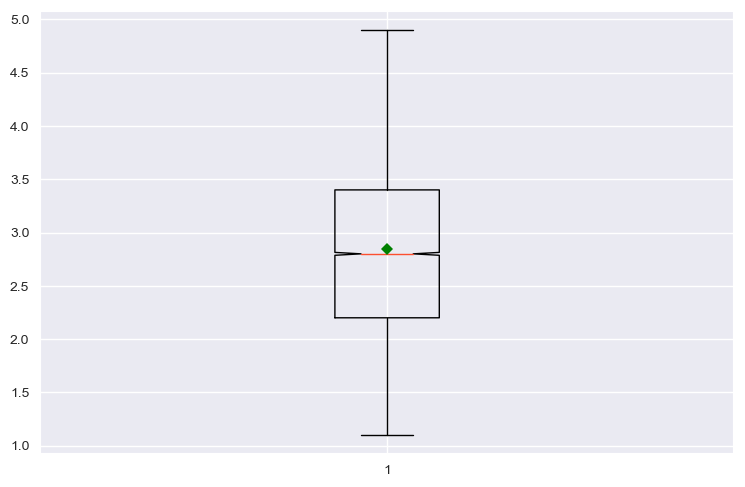

In [1256]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=df['Target_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [1257]:
df.head()

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.000000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.076246,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.205279,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.193548,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.011730,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [1258]:
#print(df.isna)
df.isna().sum()

HD_M_Value      0
HD_M_US         0
HD_M_REL_US     0
HBP_M_Value     0
HBP_M_US        0
HBP_M_REL_US    0
HC_M_Value      0
HC_M_US         0
HC_M_REL_US     0
OB_M_Value      0
OB_M_US         0
OB_M_REL_US     0
DB_M_Value      0
DB_M_US         0
DB_M_REL_US     0
Target_Value    0
dtype: int64

In [1259]:
# Count and determine the outliers 
HD_degree_counts = df['HD_M_Value'].value_counts() 
HBP_degree_counts = df['HBP_M_Value'].value_counts()
HC_degree_counts = df['HC_M_Value'].value_counts(normalize=True) # get the percentage for each group.
OB_degree_counts = df['OB_M_Value'].value_counts()
DB_degree_counts = df['DB_M_Value'].value_counts()

#print(HD_degree_counts)
#print(HBP_degree_counts)
#print(HC_degree_counts)
print(OB_degree_counts)
#print(DB_degree_counts)

26.8    118
27.1    113
26.5    113
27.9    112
24.6    109
       ... 
9.7       1
11.5      1
9.6       1
11.2      1
10.9      1
Name: OB_M_Value, Length: 404, dtype: int64


In [1260]:
## after dropping  8097  rows of outliers.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [1261]:
# verifying outliers from the mean of both lower and upper quantiles.
# Obesity= 78
# Diabetes = 171

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records
#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records
#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

#=============================================================


df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] 
df_HC_O_Grter  = df.loc[df["HC_M_Value"] > 45.0 ] 

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#print(df_HC_O_Less["HC_M_Value"].value_counts())
#print(df_HC_O_Grter["HC_M_Value"].value_counts())




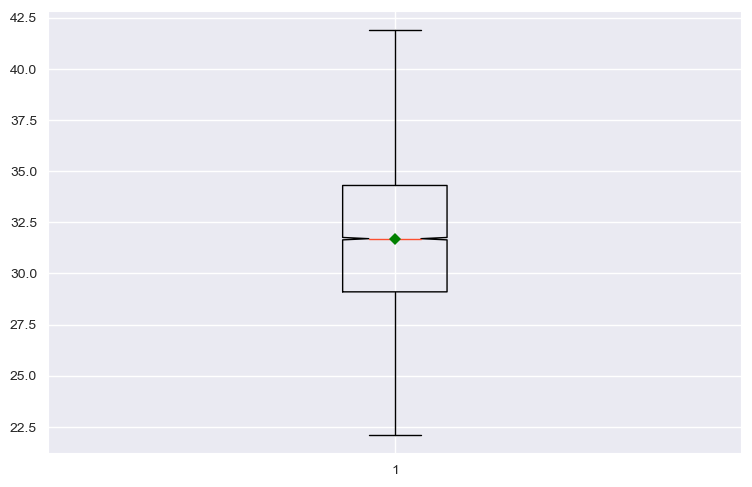

In [1262]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

C:\Users\dolly\AppData\Local\Temp\ipykernel_18972\2210461807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OB_M_Value'])


<Axes: xlabel='OB_M_Value', ylabel='Density'>

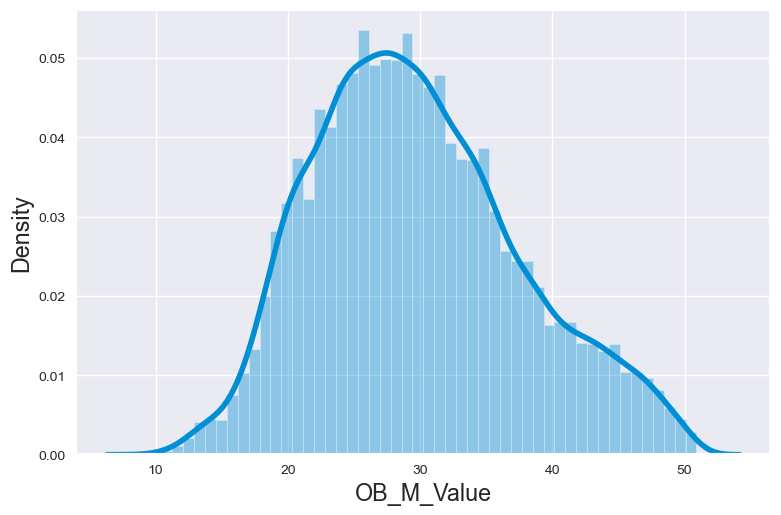

In [1263]:
sns.distplot(df['OB_M_Value'])

In [1264]:
df["OB_M_Value"].describe()



count    19112.000000
mean        29.778746
std          7.842022
min          9.600000
25%         24.000000
50%         29.000000
75%         34.800000
max         50.900000
Name: OB_M_Value, dtype: float64

In [1265]:
np.percentile(df['OB_M_Value'], [25, 50, 75, 100])

array([24. , 29. , 34.8, 50.9])

In [1266]:
import statistics

statistics.quantiles(df['OB_M_Value'])

[24.0, 29.0, 34.8]

In [1267]:
# Quantile mean it divide data into group.
# 0.50 is the median or 50% quantile. It's 0.5 quantile. 

df_Percentile = df.describe([0.15, 0.25, 0.50, 0.75])
df_Percentile

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
15%,3.600000,6.400000e+00,-0.437500,23.000000,3.240000e+01,-0.290123,27.600000,3.410000e+01,-0.190616,21.500000,3.010000e+01,-0.285714,6.700000,1.080000e+01,-0.379630,1.900000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [1268]:
df_Percentile['HD_M_Value']

count    19112.000000
mean         5.315435
std          1.704583
min          1.100000
15%          3.600000
25%          4.100000
50%          5.200000
75%          6.400000
max          9.900000
Name: HD_M_Value, dtype: float64

In [1269]:
df_Percentile['HD_M_Value'][0]

19112.0

In [1270]:
df_Percentile['HD_M_Value']['mean']
df_Percentile['HD_M_Value']['std']
df_Percentile['HD_M_Value']['15%']

3.6

In [1271]:
HD_degree_counts = df['HD_M_Value'].value_counts()

In [1272]:
#df.info().T
#df.head()
#df
#df.columns
df.describe()
#df.isna().sum()
#df.shape 

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [1273]:
#print("Index:  ", df.index)
#print("Columns:", df.columns)
#print("Size:   ", df.size)
#print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [1274]:
# Total number for all the factors by cities

##OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
#plt.legend(loc='upper right')
#plt.tight_layout()
#plt.show()


In [1275]:
df.columns


Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1276]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
#df["DB_M_Value"].describe()
df["Target_Value"].describe()



count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

In [1277]:
#df.describe().T
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

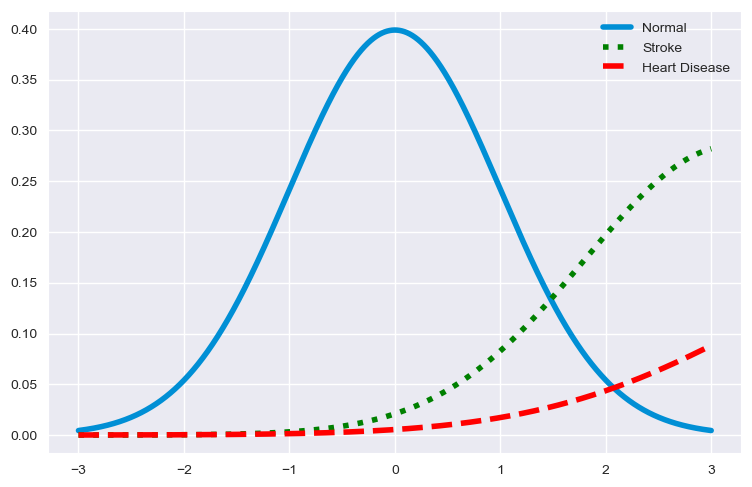

In [1278]:
from scipy.stats import norm


x = np.arange(-3, 3, 0.001)

plt.plot(x,norm.pdf(x)) # normal line
plt.plot(x, norm.pdf(x, 3.2, 1.4), 'g:') # mean of 3.2 and std 1.4 of stroke
plt.plot(x, norm.pdf(x, 5.6, 2.1), 'r--') # Heart Disease

plt.legend([ 'Normal', 'Stroke', 'Heart Disease',])
plt.show()

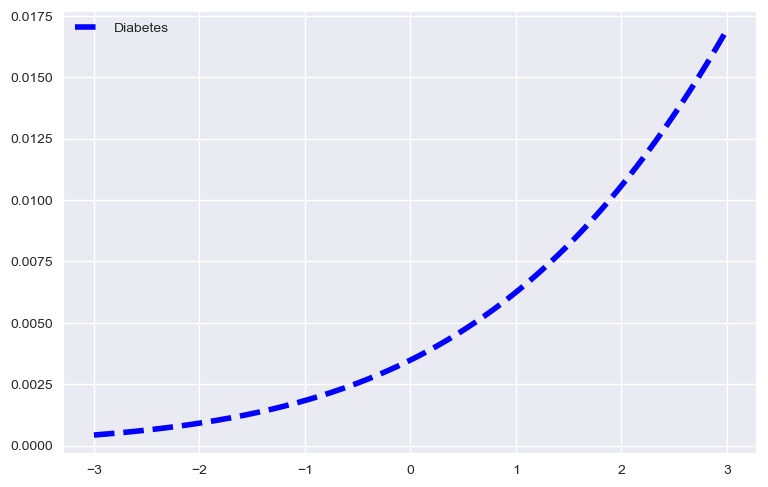

In [1279]:
x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x, 10.8, 4.2), 'b--') # DB
plt.legend([ 'Diabetes'])
plt.show()

In [1280]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1281]:
from scipy.stats import skew

In [1282]:
# Cal.  and extract the lowest point lower quantile
df.HD_M_Value.quantile(0.3)

4.4

In [1283]:
# Cal.  and extract the highest point upper quantile
df.HD_M_Value.quantile(0.7)


6.1

In [1284]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1285]:
# Extract Skewness 
HD_skew = skew(df['HD_M_Value'])
HBP_skew = skew(df['HBP_M_Value'])
HC_skew = skew(df['HC_M_Value'])

OB_skew = skew(df['OB_M_Value'])
DB_skew = skew(df['DB_M_Value'])
STK_skew = skew(df['Target_Value'])

print(HD_skew)
print(HBP_skew)
print(HC_skew)
print(OB_skew)
print(DB_skew)
print(STK_skew)



0.31822550937884453
0.2440983386931991
-0.04141745598724707
0.39347948883113487
0.34294882665638926
0.3327762902205886


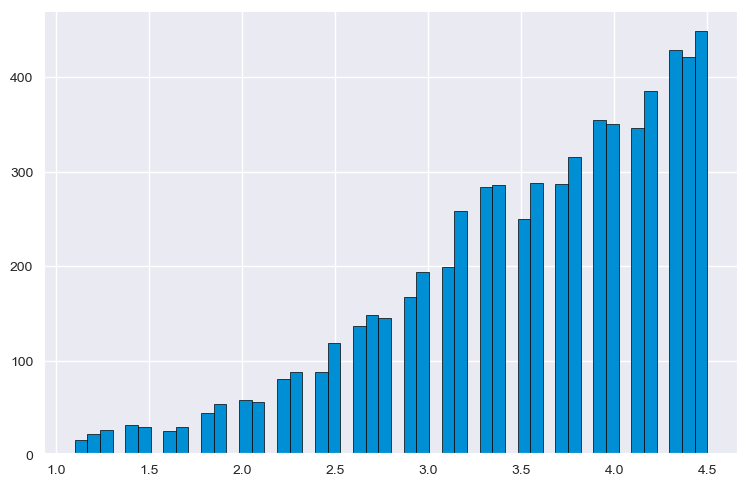

In [1286]:
# Highest point of lower quantile
df_HDs = df.loc[df["HD_M_Value"] < 4.6]
#df_HDs["HD_M_Value"]

plt.hist(df_HDs.HD_M_Value, bins=50, edgecolor='black')
plt.show()

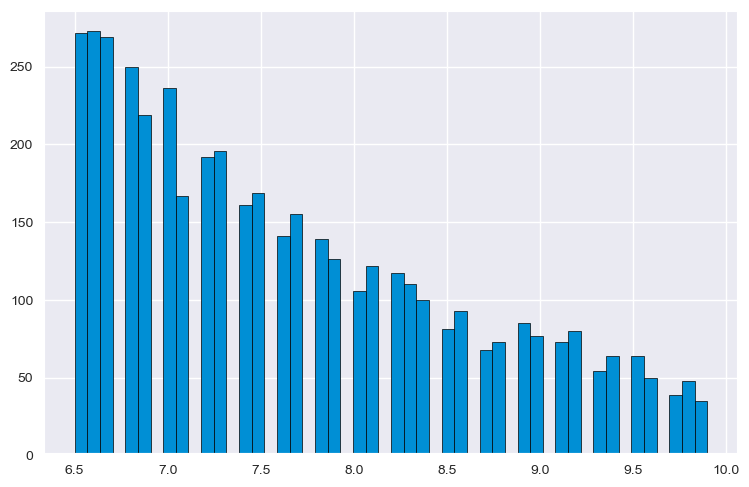

In [1287]:
# the highest point upper quantile
df.HD_M_Value.quantile(0.7)
df_HDx = df.loc[df["HD_M_Value"] > 6.4]
#df_HDs["HD_M_Value"]

plt.hist(df_HDx.HD_M_Value, bins=50, edgecolor='black')
plt.show()

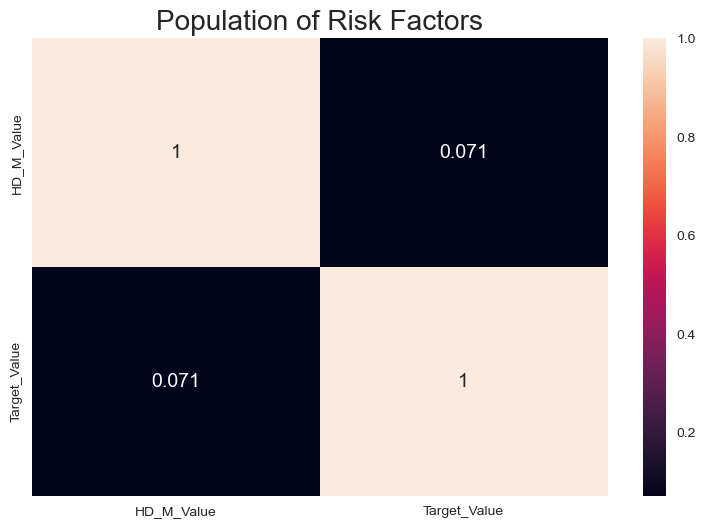

In [1288]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value','Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

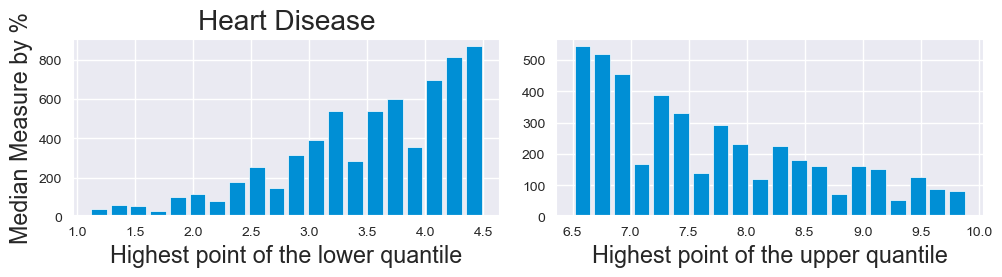

In [1289]:

plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HDs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

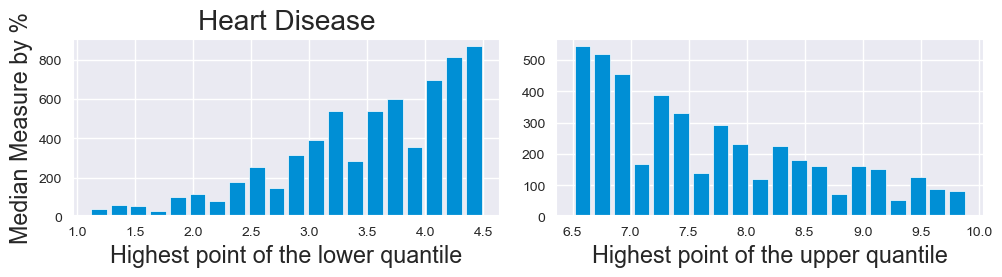

In [1290]:
plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HBPs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

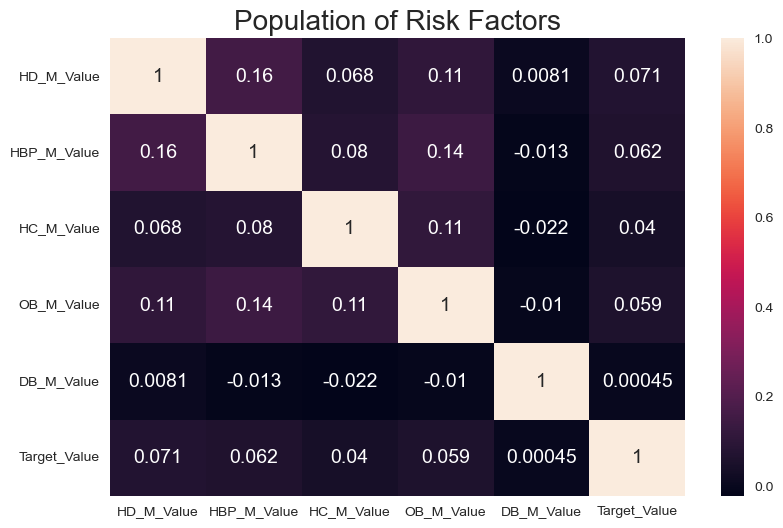

In [1291]:
#Heatmap - illustrate from the low to high scales.  It  shows which is skewed to the lower or higher end or from the median.

plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value','DB_M_Value', 'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

Histrograms =  show the frequency of distribution. 

In [1292]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [1293]:
DB_degree_counts = df['DB_M_Value'].value_counts()

print(DB_degree_counts)

8.9    264
9.1    261
8.3    254
8.4    251
9.4    248
      ... 
0.9      4
2.0      4
1.8      4
1.1      2
1.0      2
Name: DB_M_Value, Length: 180, dtype: int64


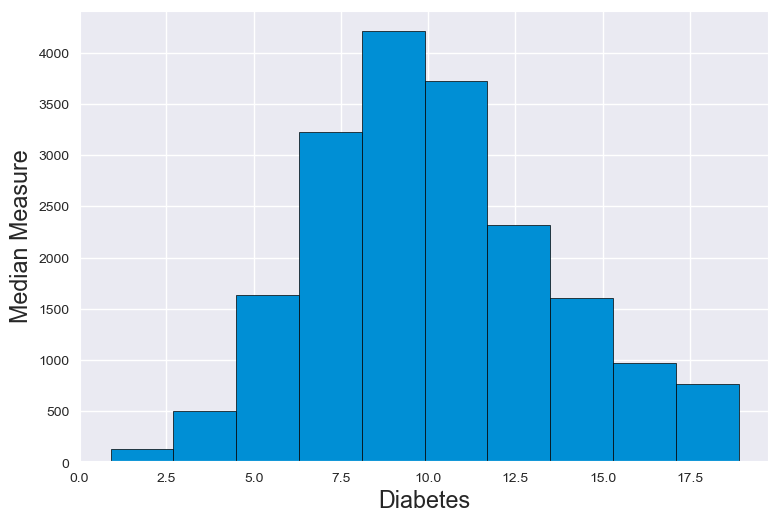

In [1294]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses,  edgecolor='black')
plt.show()

In [1295]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [1296]:
df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 20.0 ] # 99 records

print(df_DB_O_Less["HC_M_Value"].value_counts())
#print(df_DB_O_Greater["HC_M_Value"].value_counts())


29.9    4
36.3    2
32.0    2
34.5    2
36.5    2
29.7    2
29.8    2
30.6    2
24.6    1
34.0    1
31.2    1
26.0    1
30.9    1
28.4    1
33.9    1
32.8    1
35.8    1
39.7    1
33.0    1
35.7    1
29.3    1
32.3    1
37.0    1
36.7    1
29.2    1
23.0    1
30.1    1
34.2    1
29.1    1
28.7    1
32.4    1
34.7    1
31.4    1
29.5    1
34.9    1
36.2    1
30.5    1
28.3    1
30.2    1
28.5    1
31.9    1
31.1    1
27.2    1
33.4    1
33.3    1
Name: HC_M_Value, dtype: int64


In [1297]:
DB_skew = skew(df['DB_M_Value'])

print(DB_skew)

0.34294882665638926


<Axes: xlabel='DB_M_Value'>

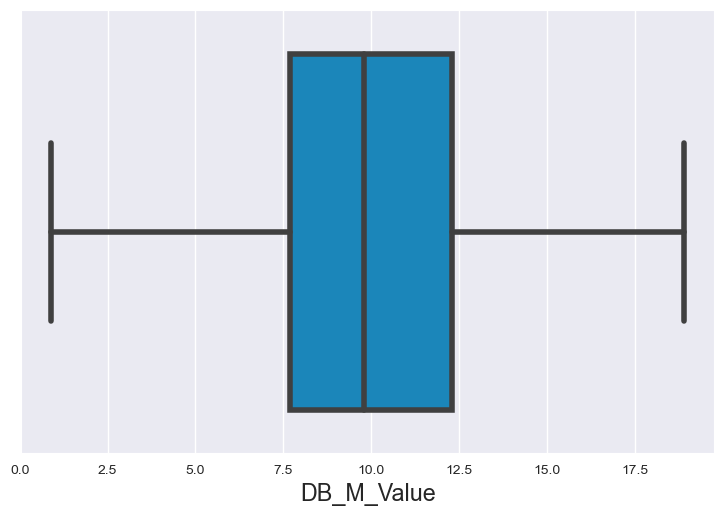

In [1298]:
sns.boxplot(x='DB_M_Value', data=df)


C:\Users\dolly\AppData\Local\Temp\ipykernel_18972\1637939683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DB_M_Value'])


<Axes: xlabel='DB_M_Value', ylabel='Density'>

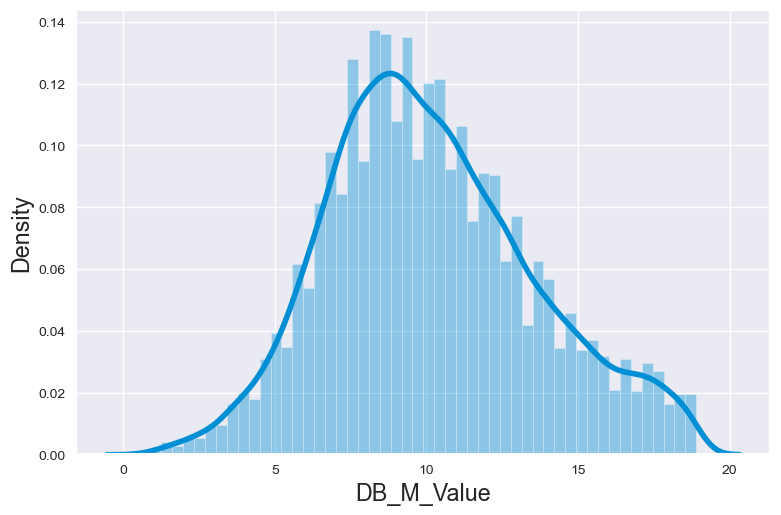

In [1299]:
sns.distplot(df['DB_M_Value'])

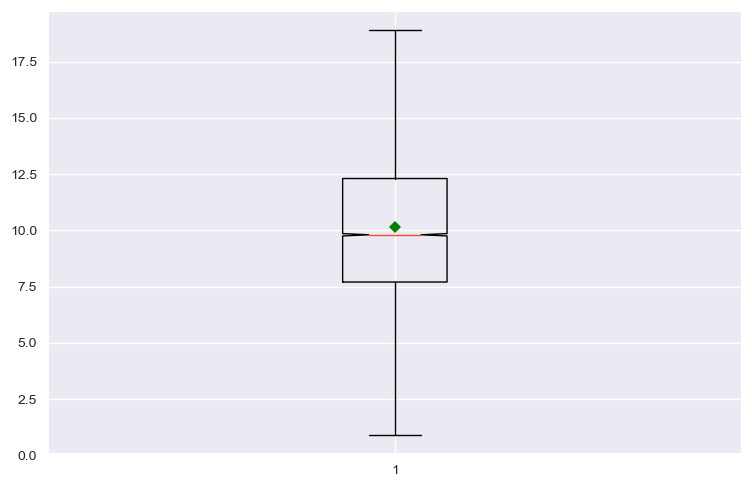

In [1300]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['DB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

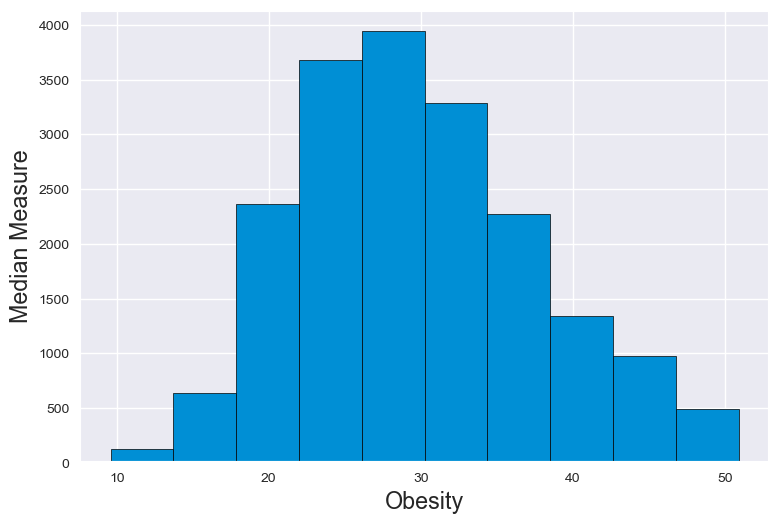

In [1301]:
#plt.title('Population by cities')
plt.xlabel('Obesity')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

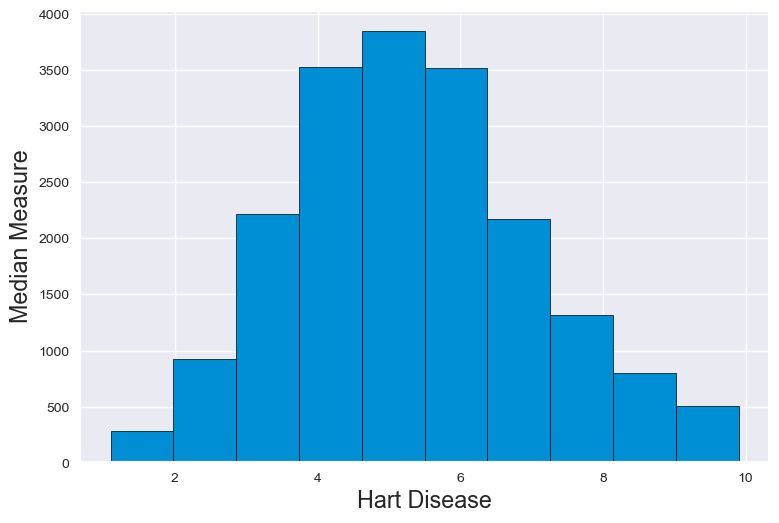

In [1302]:
#plt.title('Population')
plt.xlabel('Hart Disease')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

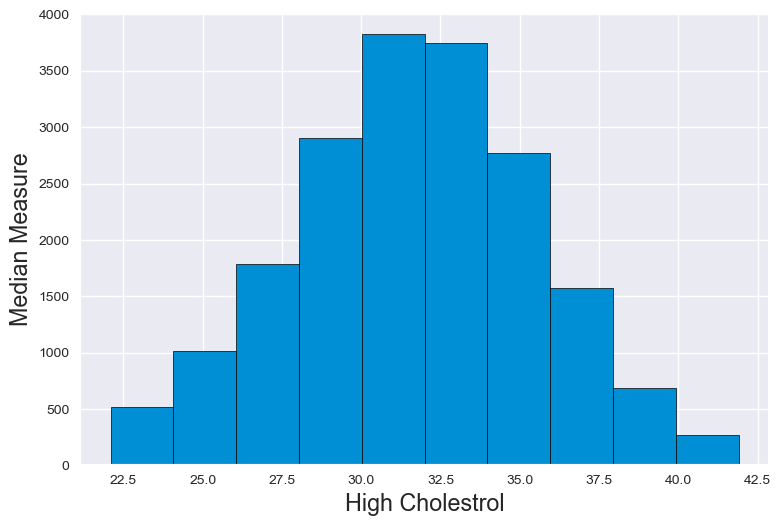

In [1303]:
plt.xlabel('High Cholestrol')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HC_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

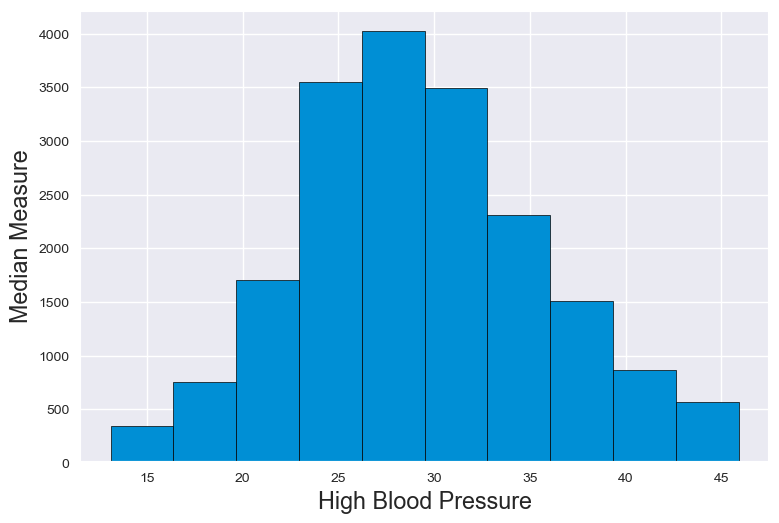

In [1304]:
plt.xlabel('High Blood Pressure')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HBP_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

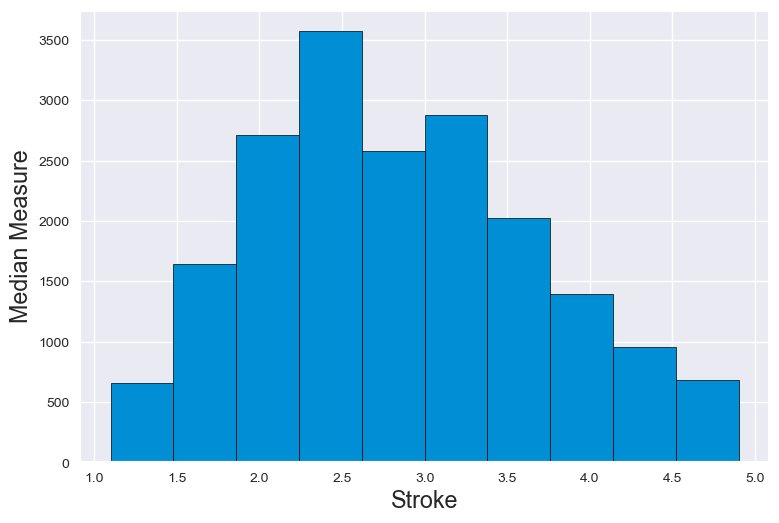

In [1305]:
plt.xlabel('Stroke')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['Target_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [1306]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

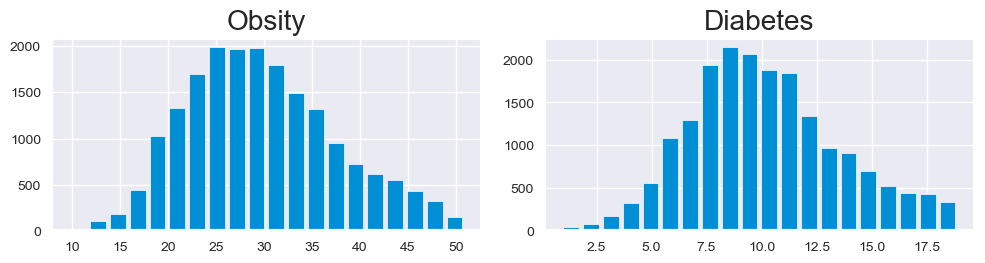

In [1307]:
# Histrogram - subplot


plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 
plt.hist(df.OB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Obsity')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,2) 
plt.hist(df.DB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Diabetes')
#plt.ylabel('Median Measure')
plt.title('Diabetes')
plt.tight_layout()
#plt.legend(loc='upper right')




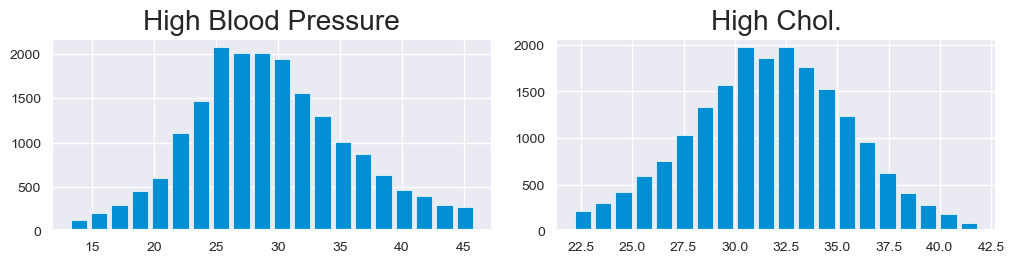

In [1308]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HBP_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Blood Pressure')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.HC_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Chol.')
plt.tight_layout()
#plt.legend(loc='upper right')




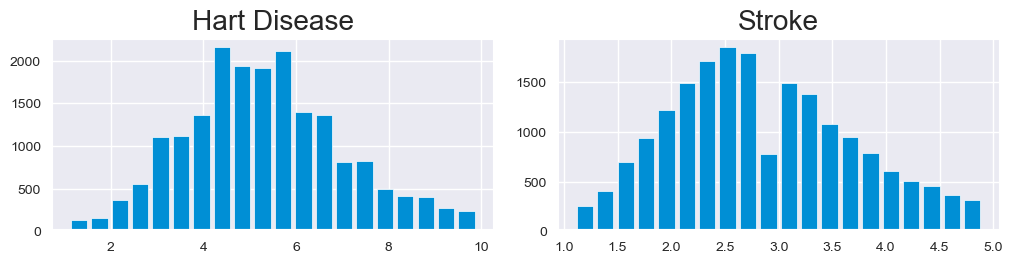

In [1309]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Hart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.Target_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Stroke')
plt.tight_layout()
#plt.legend(loc='upper right')



In [1310]:
np.percentile(df['HD_M_Value'],1)

1.8

In [1311]:
np.percentile(df['HD_M_Value'],25)

4.1

In [1312]:
np.percentile(df['HD_M_Value'],50)

5.2

In [1313]:
np.percentile(df['HD_M_Value'],85)

7.1

In [1314]:
np.percentile(df['HD_M_Value'],95)

8.5

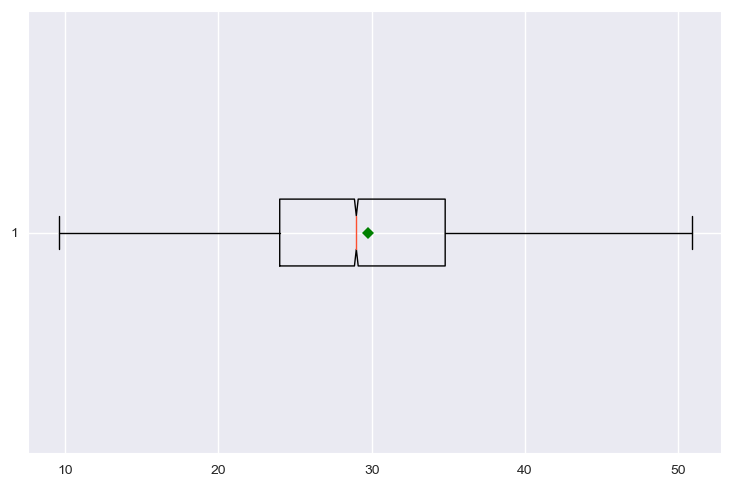

In [1315]:
#df['DB_M_Value'].plot(kind='box');
#plt.semilogy
# The line is the median(middle point)
# The diamon is the mean value
# Red circle is the outliers


red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

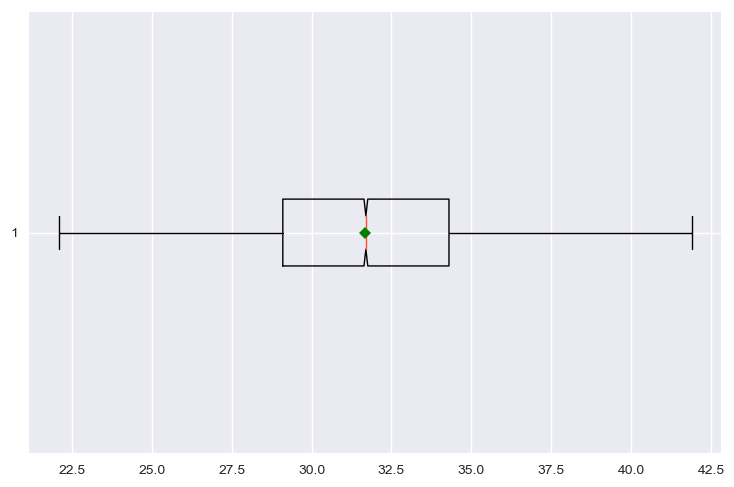

In [1316]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

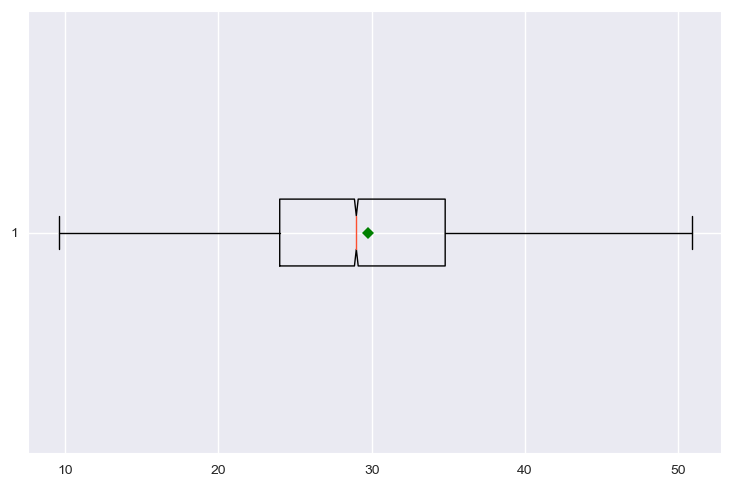

In [1317]:

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

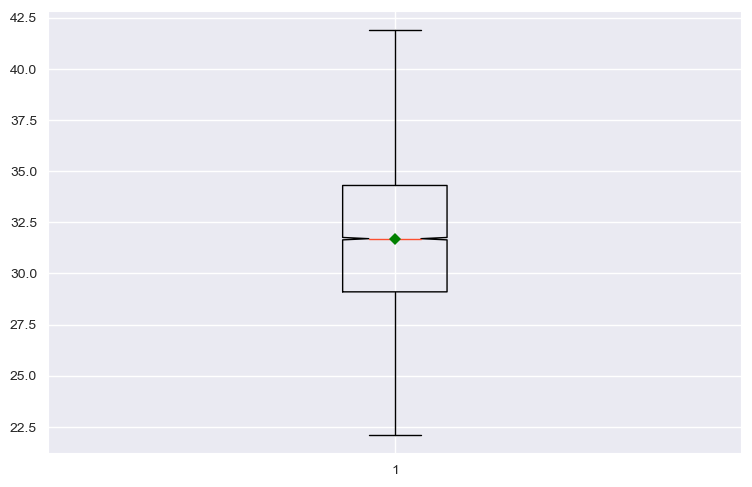

In [1318]:

red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

<Axes: xlabel='DB_M_Value'>

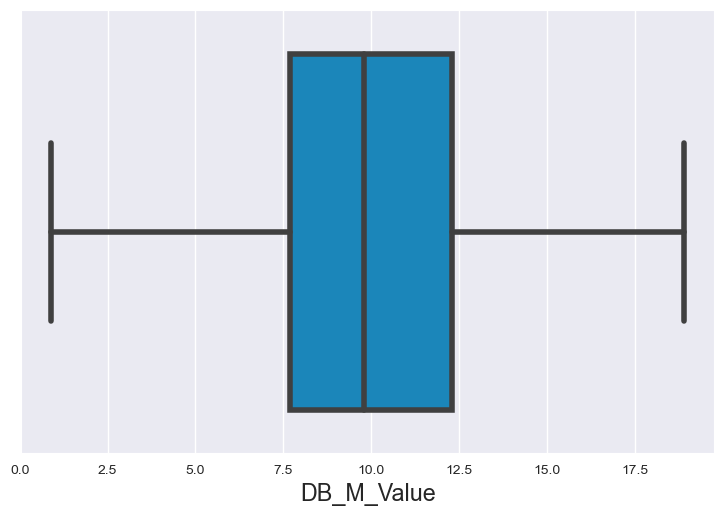

In [1319]:
sns.boxplot(x='DB_M_Value', data=df)

In [1320]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [1321]:
#df_01 = df.iloc[:,1:15]
#df_01

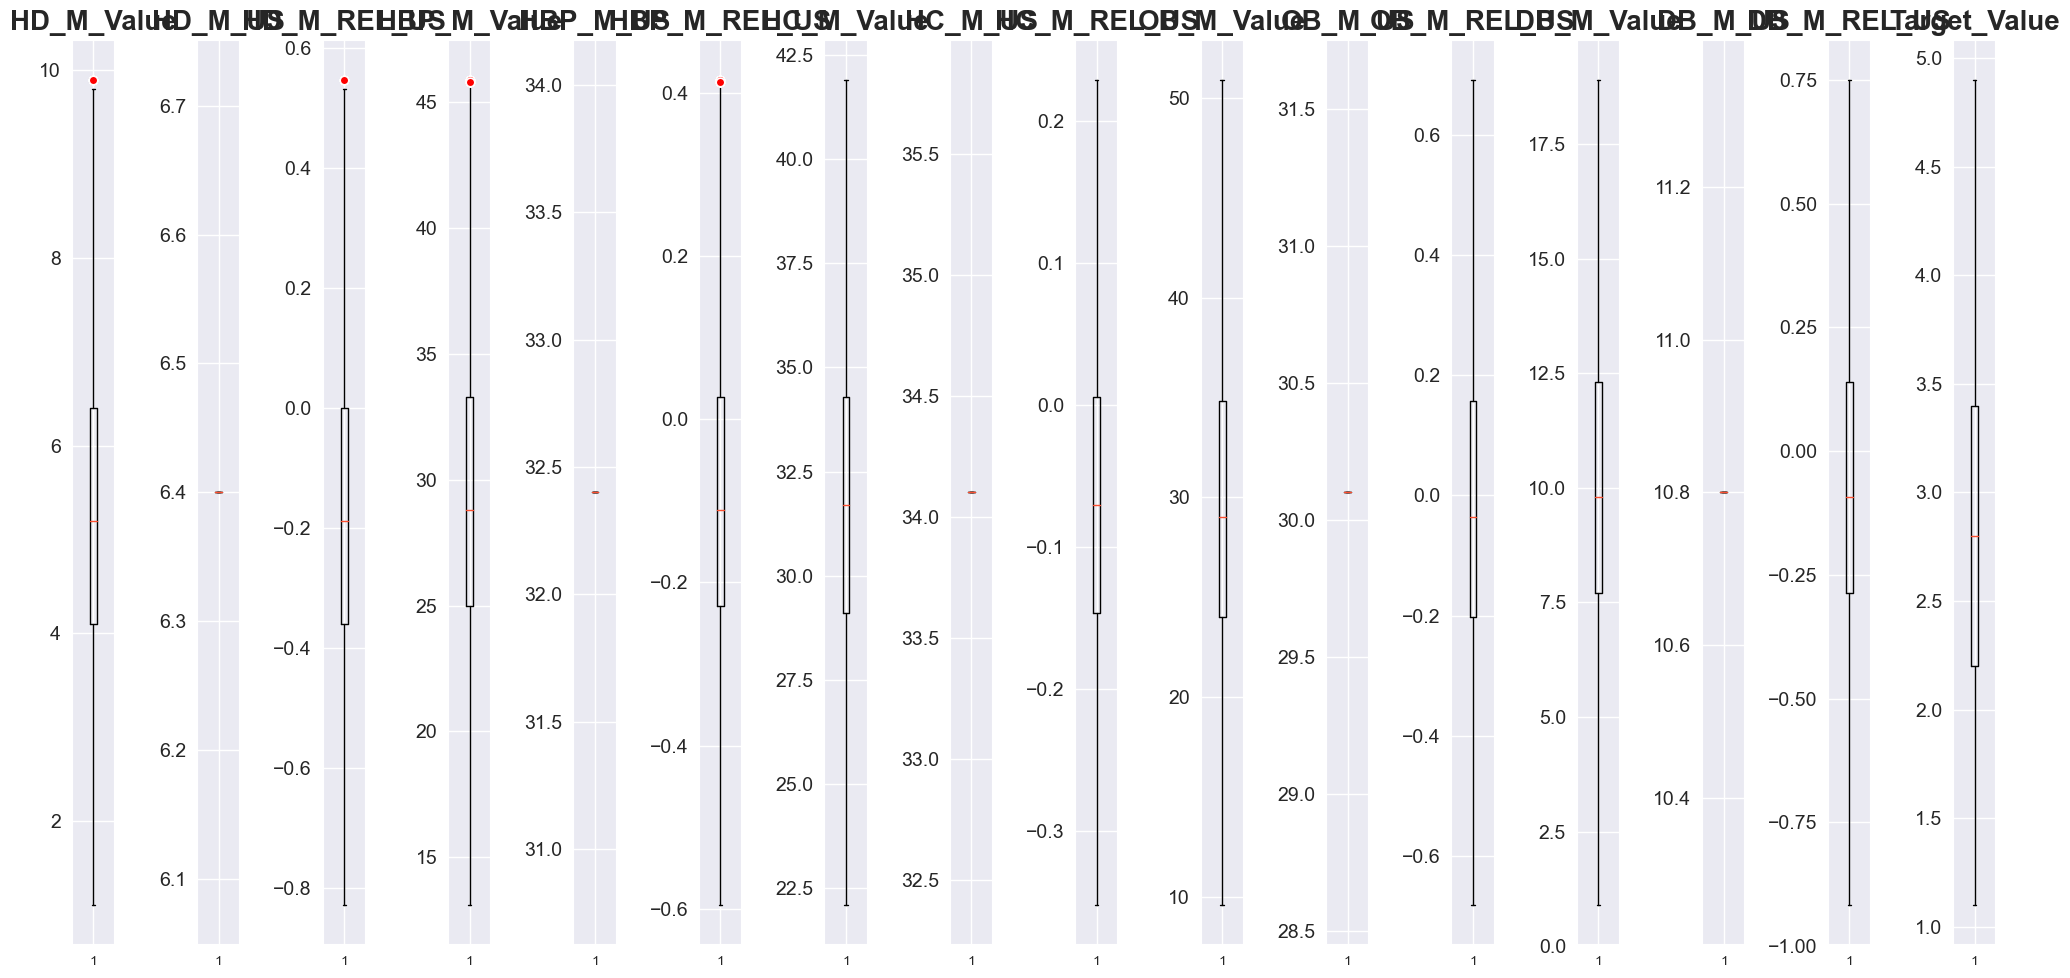

In [1322]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'HD_M_Value' or  df.columns[i] == 'HD_M_US':
        ax.semilogy
        
plt.tight_layout()

In [1323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


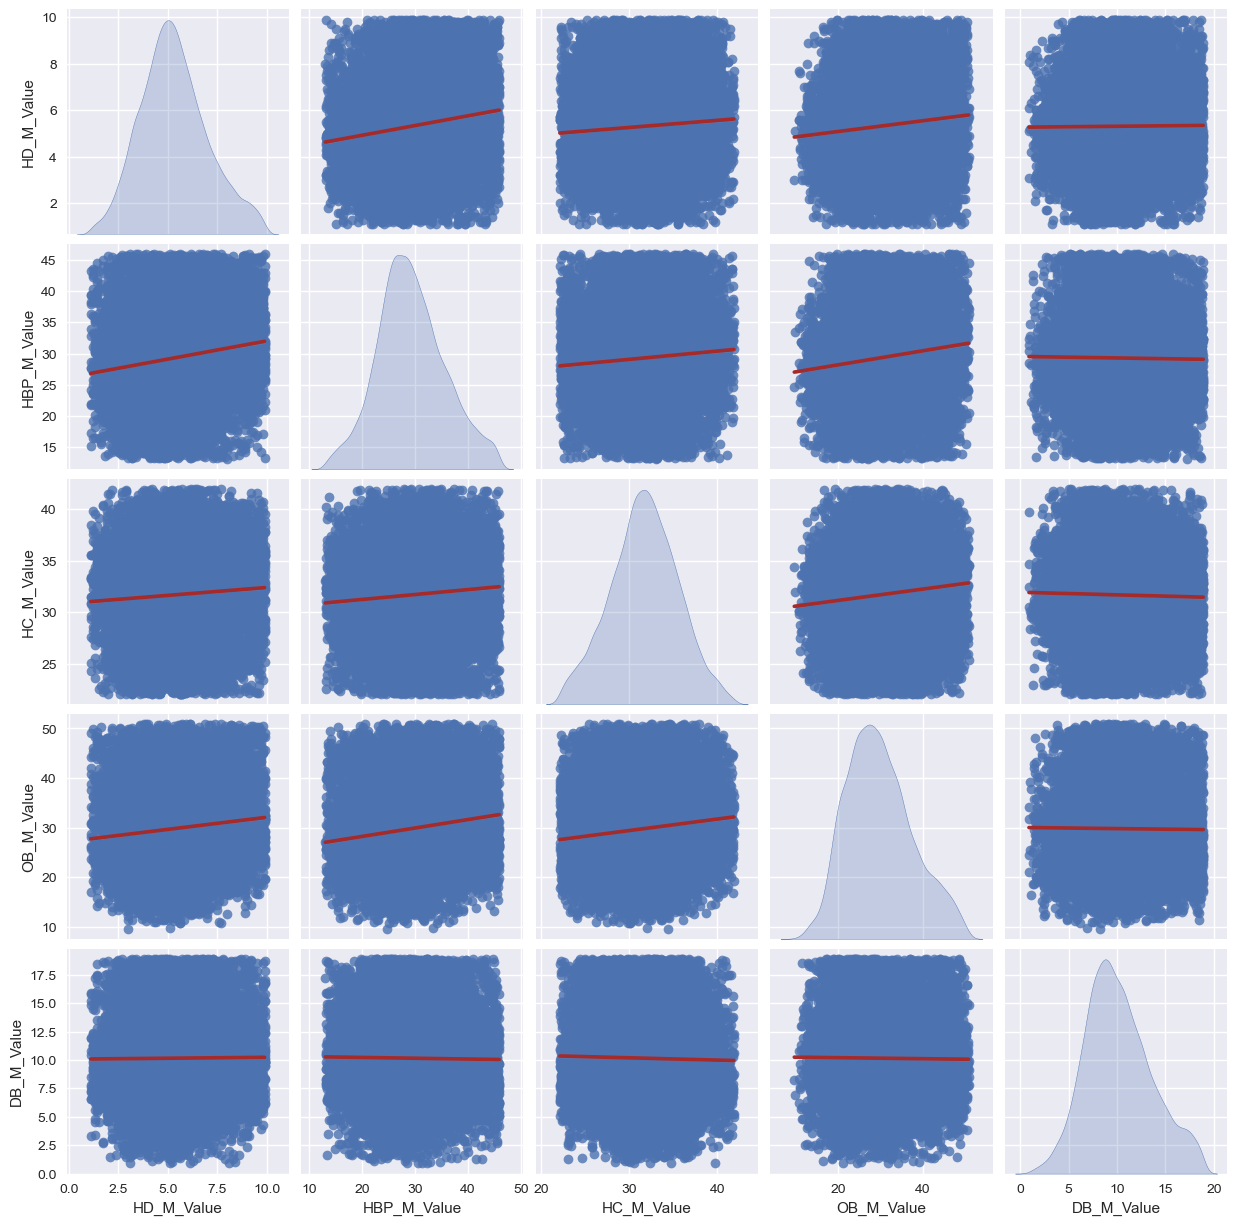

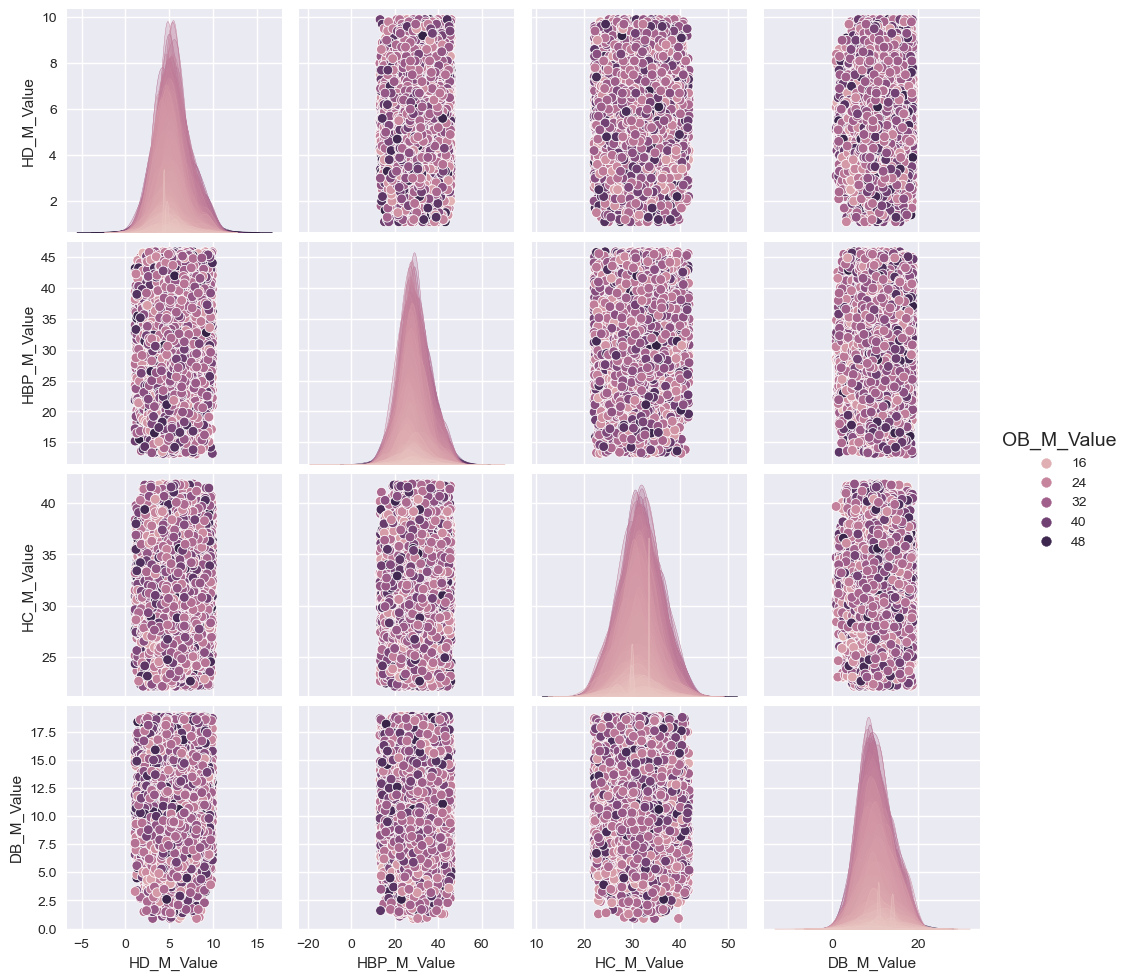

In [1395]:
# Pairplot 
#df02 = df[df['HD_M_Value'] <= 4.200000 ]
col_to_plot01 = ['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value', 'DB_M_Value']
sns.pairplot(df[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})
sns.pairplot(df[col_to_plot01], hue='OB_M_Value' )


In [1325]:
# Scatter splot
#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9) # alpha is the clarity of the colors
#plt.scatter(x='HBP_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='HC_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='OB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='DB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)


#plt.xlabel('Heart Disease', fontsize=12)
#plt.xlabel('High Blood Pressure', fontsize=12)
#plt.ylabel('Stroke', fontsize=12)
#plt.colorbar(label='Gamma Ray - API')
#plt.show()

## ML starts below:

In [1326]:
#df_org_01
df_ML.columns

Index(['Year', 'HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value',
       'HBP_M_US', 'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US',
       'OB_M_Value', 'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US',
       'DB_M_REL_US', 'Target_Value'],
      dtype='object')

In [1358]:
df

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9
...,...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9,1.3
27206,4.9,32.5,30.7,33.0,7.4,3.1
27207,6.7,31.3,28.0,33.9,10.3,4.5
27208,5.2,31.9,34.1,29.7,16.4,4.9


## Dividing the dataset into independent and dependent features.

In [1327]:
df_ML.head()

,Year,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,2017Tract2,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.0000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,2017Tract4,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.0762,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,2017Tract5,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.2053,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,2017Tract7,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.1935,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,2017Tract8,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.0117,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [1328]:
ml01_df = df_ML.drop(columns = ['HD_M_US', 'HD_M_REL_US','HBP_M_US', 'HBP_M_REL_US', 'HC_M_US',  'HC_M_REL_US', 'OB_M_US', 'OB_M_REL_US', 'DB_M_US', 'DB_M_REL_US' ])

In [1329]:
ml01_df.head()

,Year,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,2017Tract2,4.2,32.3,34.1,30.3,12.2,3.4
2,2017Tract4,5.8,33.8,36.7,17.3,9.9,3.1
3,2017Tract5,4.4,27.4,27.1,22.1,14.7,2.0
5,2017Tract7,3.5,24.4,27.5,25.3,11.4,2.6
6,2017Tract8,5.5,28.1,33.7,22.5,3.4,2.9


In [1330]:
ml01_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583,1.1,4.1,5.2,6.4,9.9
HBP_M_Value,19112.0,29.301020,6.360551,13.1,25.0,28.8,33.3,45.9
HC_M_Value,19112.0,31.673205,3.816437,22.1,29.1,31.7,34.3,41.9
OB_M_Value,19112.0,29.778746,7.842022,9.6,24.0,29.0,34.8,50.9
DB_M_Value,19112.0,10.153558,3.429738,0.9,7.7,9.8,12.3,18.9
Target_Value,19112.0,2.840828,0.850926,1.1,2.2,2.8,3.4,4.9


In [1331]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
from sklearn import linear_model

In [1332]:
# scatter plot the regression line of predicted value "STROKE" vs. each factor.
xs=ml01_df.iloc[:, :1] # Independent features -  select only HD_M_Value.
ys=ml01_df.iloc[:, -1]  # Select only dependent feature (Stroke).

In [1333]:
ml01_df.iloc[:, 1]
#df.iloc[:, -1]
#print(ys)

0        4.2
2        5.8
3        4.4
5        3.5
6        5.5
        ... 
27205    3.3
27206    4.9
27207    6.7
27208    5.2
27209    4.8
Name: HD_M_Value, Length: 19112, dtype: float64

In [1334]:
print(np.shape(xs))
print(np.shape(ys))

(19112, 1)
(19112,)


In [ ]:
#Convert column into list for scatter plot

HD_df_ToList = ml01_df['HD_M_Value'] = ml01_df['HD_M_Value'].tolist()
STK_df_ToList = ml01_df['Target_Value'] = ml01_df['Target_Value'].tolist()
STK_df_ToList

In [1336]:
# Setting variables for X and Y on HD
xs = np.array(HD_df_ToList, dtype=np.float64)
ys = np.array(STK_df_ToList, dtype=np.float64)

In [1337]:
#  Manual calculation - HD_M_value * .035 - 2.65 = predicted value of stroke.

slope_HD_X = (((mean(xs) * mean(ys)) - mean(xs * ys))/ (( mean(xs) * mean(xs)) - mean(xs* xs)) )
xy_intercept = mean(ys) - slope_HD_X * mean(xs)
HD_Predicted = ml01_df['HD_M_Value'] * slope_HD_X - xy_intercept

#print(slope_HD_X) #  the results - for every X increases(HD), the (Y) predicted to increase.
#print(xy_intercept)
print(HD_Predicted)




0       -2.501456
2       -2.444391
3       -2.494323
5       -2.526421
6       -2.455091
           ...   
27205   -2.533555
27206   -2.476490
27207   -2.412292
27208   -2.465790
27209   -2.480056
Name: HD_M_Value, Length: 19112, dtype: float64


In [1338]:
diff = ((STK_df_ToList) - (HD_Predicted))
print(diff)

0        5.901456
2        5.544391
3        4.494323
5        5.126421
6        5.355091
           ...   
27205    3.833555
27206    5.576490
27207    6.912292
27208    7.365790
27209    7.380056
Name: HD_M_Value, Length: 19112, dtype: float64


In [1339]:
#abs(y_test-y_pred)

pred_HD_df = pd.DataFrame({'High Blood Pressure':ml01_df['HD_M_Value'], 'Slope':(((mean(xs) * mean(ys)) - mean(xs * ys))/ (( mean(xs) * mean(xs)) - mean(xs* xs)) ) , 'Intercept':mean(ys) - slope_HD_X * mean(xs),   'Predicted':ml01_df['HD_M_Value'] * slope_HD_X - xy_intercept, 'Target':ml01_df['Target_Value'], 'Diff':ml01_df['Target_Value'] - abs((ml01_df['HD_M_Value'] * slope_HD_X) - abs(xy_intercept)) })


In [1340]:
pred_HD_df

,High Blood Pressure,Slope,Intercept,Predicted,Target,Diff
0,4.2,0.035665,2.65125,-2.501456,3.4,0.898544
2,5.8,0.035665,2.65125,-2.444391,3.1,0.655609
3,4.4,0.035665,2.65125,-2.494323,2.0,-0.494323
5,3.5,0.035665,2.65125,-2.526421,2.6,0.073579
6,5.5,0.035665,2.65125,-2.455091,2.9,0.444909
...,...,...,...,...,...,...
27205,3.3,0.035665,2.65125,-2.533555,1.3,-1.233555
27206,4.9,0.035665,2.65125,-2.476490,3.1,0.623510
27207,6.7,0.035665,2.65125,-2.412292,4.5,2.087708
27208,5.2,0.035665,2.65125,-2.465790,4.9,2.434210


In [1341]:
Stroke_and_HD = linear_model.LinearRegression()
Stroke_and_HD.fit(xs.reshape(-1,1),ys)


LinearRegression()

In [1342]:
regression_line = Stroke_and_HD.predict(xs.reshape(-1,1))

C:\Users\dolly\AppData\Local\Temp\ipykernel_18972\2114411019.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


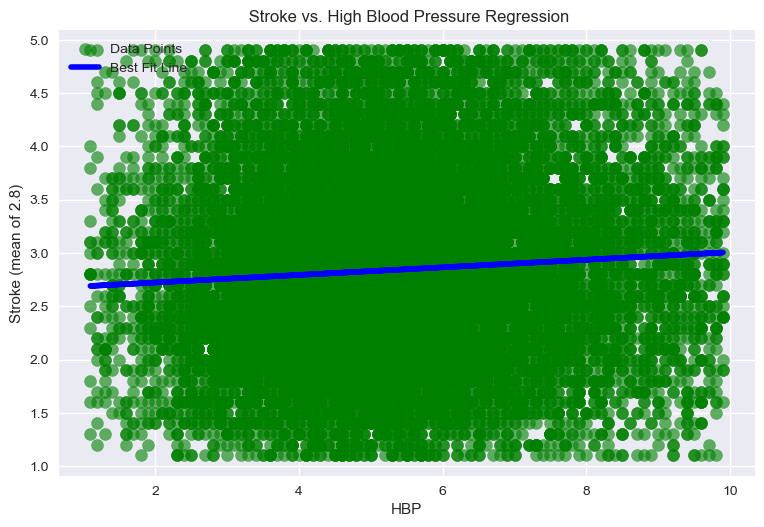

In [1343]:
style.use('seaborn')
plt.scatter(xs,ys, label='Data Points', alpha=0.6, color='green', s=75)
plt.plot(xs, regression_line, label ='Best Fit Line', color='blue', linewidth=4)
plt.title(' Stroke vs. High Blood Pressure Regression')
plt.xlabel('HBP')
plt.ylabel('Stroke (mean of 2.8)')
plt.legend()
plt.show()

Next:

In [1344]:
# check the corr against the Target_value.
ml01_df.corr()['Target_Value']



C:\Users\dolly\AppData\Local\Temp\ipykernel_18972\1998431619.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ml01_df.corr()['Target_Value']


HD_M_Value      0.071445
HBP_M_Value     0.062355
HC_M_Value      0.039616
OB_M_Value      0.058736
DB_M_Value      0.000447
Target_Value    1.000000
Name: Target_Value, dtype: float64

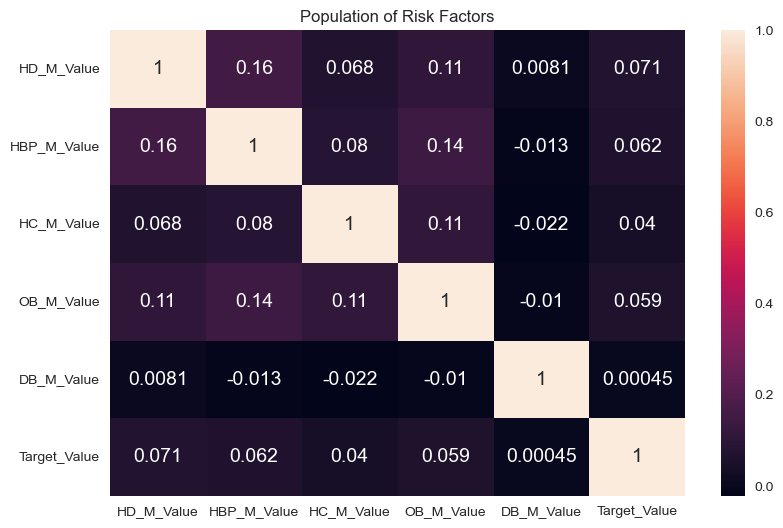

In [1345]:
# Lighter color has more corrsponding data to the target.
# Darker color has less connection to the target.
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value',	'HBP_M_Value',	'HC_M_Value',	'OB_M_Value',	'DB_M_Value',	'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

#### Below is the dataframe for the ML models:

ML Analysis - LinearRegression Model

In [1346]:
# laod types of model to use.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [1356]:
# Dropping - including the target -> 'TargetStroke'
df = ml01_df.drop(['Year'],axis='columns' )
df

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9
...,...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9,1.3
27206,4.9,32.5,30.7,33.0,7.4,3.1
27207,6.7,31.3,28.0,33.9,10.3,4.5
27208,5.2,31.9,34.1,29.7,16.4,4.9


In [1369]:
X=df.iloc[:, 1:] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

X
#y

,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,32.3,34.1,30.3,12.2,3.4
2,33.8,36.7,17.3,9.9,3.1
3,27.4,27.1,22.1,14.7,2.0
5,24.4,27.5,25.3,11.4,2.6
6,28.1,33.7,22.5,3.4,2.9
...,...,...,...,...,...
27205,20.8,27.6,33.8,11.9,1.3
27206,32.5,30.7,33.0,7.4,3.1
27207,31.3,28.0,33.9,10.3,4.5
27208,31.9,34.1,29.7,16.4,4.9


In [1370]:

# Setting up the plit for all models below:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train)
len(X_test)

X_train.shape
#X_test
#y_train



(15289, 5)

ML Analyzing using - Linear Regression Model.

In [1371]:
# Fit/load into a model
# problem with the object data type "Year"
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [1372]:
df.head()

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9


In [1373]:
X_predict_test = modelReg.predict([[ 4.2, 32.3,	34.1,	30.3,	12.2,	 ]])
X_predict_test

c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.2])

In [1374]:
y_pred = modelReg.predict(X_test) # predict X(all factors).
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)

1.0

In [1375]:
# plot to compare the differenct in these two values.
# Actual Values
print(y_test)

#Predicted X Values to test against Y(Target_Value).
print(y_pred)

10341    1.1
17755    1.9
14703    3.8
19835    2.8
19141    3.7
        ... 
12941    3.0
15234    3.8
20814    3.1
26070    2.2
17448    1.5
Name: Target_Value, Length: 3823, dtype: float64
[1.1 1.9 3.8 ... 3.1 2.2 1.5]


Predicted Values save to df - Linear Regression 

In [1376]:
# Creating new df for the results
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:20]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
10341,1.1,1.1,4.440892e-16,1.972152e-31,4.037175e-14
17755,1.9,1.9,2.220446e-16,4.930381e-32,1.168656e-14
14703,3.8,3.8,4.440892e-16,1.972152e-31,1.168656e-14
19835,2.8,2.8,0.000000e+00,0.000000e+00,0.000000e+00
19141,3.7,3.7,4.440892e-16,1.972152e-31,1.200241e-14
781,3.1,3.1,0.000000e+00,0.000000e+00,0.000000e+00
10074,1.6,1.6,4.440892e-16,1.972152e-31,2.775558e-14
7789,2.8,2.8,0.000000e+00,0.000000e+00,0.000000e+00
4992,3.9,3.9,4.440892e-16,1.972152e-31,1.138690e-14
6450,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00


In [1377]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

1.0
Score 1.0
r2:1.0  
mae:2.23438554838241e-16  
MAE =  2.23438554838241e-16
MAD =  2.23438554838241e-16
MSE =  1.2737998889726545e-31
MAPE =  8.520370878050093e-15


In [1378]:
#model_ranks=pd.Series(modelReg.feature_importances_,index=X_train.columns,name='Importance')
#ax=model_ranks.plot(kind='barh')

In [1379]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


XGBRegessor ML Model

In [1380]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)
modelXGB.predict(X_test)
#y_test  


y_pred = modelXGB.predict(X_test) # Predicting X(all factors).
modelXGB.score(X_test,y_test) # The performance.


0.9999999994146898

In [1381]:

#-=================
# Creating new df - holding values for Decision Tree

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:20]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
10341,1.1,1.100080,8.037090e-05,6.459482e-09,0.007306
17755,1.9,1.900009,9.393692e-06,8.824145e-11,0.000494
14703,3.8,3.799991,9.107590e-06,8.294819e-11,0.000240
19835,2.8,2.800003,2.574921e-06,6.630216e-12,0.000092
19141,3.7,3.700040,3.986359e-05,1.589106e-09,0.001077
781,3.1,3.099998,1.525879e-06,2.328306e-12,0.000049
10074,1.6,1.600010,1.003742e-05,1.007498e-10,0.000627
7789,2.8,2.800003,2.574921e-06,6.630216e-12,0.000092
4992,3.9,3.899995,5.388260e-06,2.903334e-11,0.000138
6450,3.0,3.000001,9.536743e-07,9.094947e-13,0.000032


In [1382]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

Score 0.9999999994146898
r2:0.9999999994146775  
mae:1.0226984595322126e-05  
mean_absolute_error =  1.0226984595322126e-05
mean_absolute_percentage_error =  3.880672187687e-06
MAD =  1.0226984595322126e-05
MSE =  4.143917011055184e-10
MAPE =  0.0003880710034208284
MSE =  4.143917011055184e-10
SSE =  1.5842194733263968e-06


ML Analyzing using - Decision Tree Model.

In [1383]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.


1.0

In [1384]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:20]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
10341,1.1,1.1,4.440892e-16,1.972152e-31,4.037175e-14
17755,1.9,1.9,1.487699e-14,2.213248e-28,7.829994e-13
14703,3.8,3.8,2.398082e-14,5.750796e-28,6.310741e-13
19835,2.8,2.8,3.197442e-14,1.022364e-27,1.141944e-12
19141,3.7,3.7,2.309264e-14,5.332700e-28,6.241254e-13
781,3.1,3.1,6.661338e-15,4.437343e-29,2.148819e-13
10074,1.6,1.6,8.437695e-15,7.119470e-29,5.273559e-13
7789,2.8,2.8,3.197442e-14,1.022364e-27,1.141944e-12
4992,3.9,3.9,1.332268e-15,1.774937e-30,3.416071e-14
6450,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00


In [1385]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 1.0
r2:1.0  
mae:1.4314703983736127e-14  
mean_absolute_error =  1.4314703983736127e-14
mean_absolute_percentage_error =  5.281196277157267e-15
MAD =  1.4314703983736127e-14
MSE =  3.6105947484490372e-28
MAPE =  5.281196277157272e-13


In [1386]:
from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_DT_df['Actual Stroke Value'], pred_y_DT_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_DT_df['Sqr'].sum())

MSE =  3.6105947484490372e-28
SSE =  1.380330372332067e-24


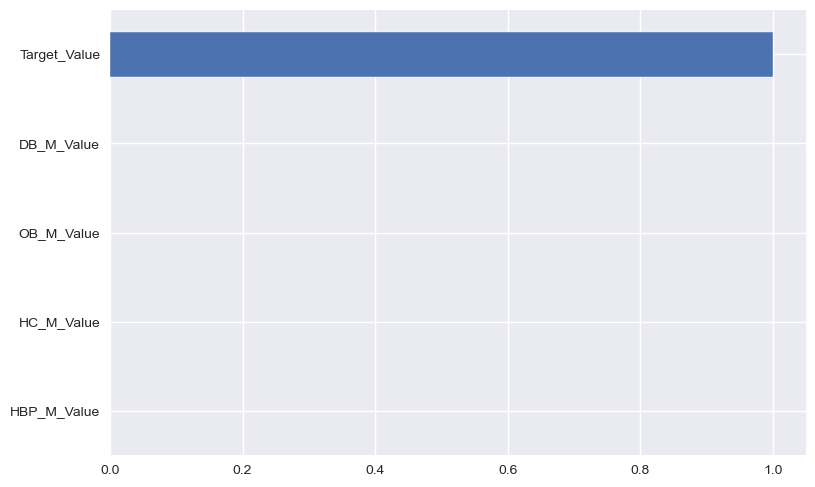

In [1387]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

#### ML Analyzing using - RandomForestRegressor Model.

In [1388]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
modelRF.score(X_test,y_test)



1.0

In [1389]:

pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:20]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
18917,3.3,3.3,1.598721e-14,2.555909e-28,4.844610e-13
4592,2.3,2.3,5.773160e-15,3.332937e-29,2.510069e-13
6439,2.5,2.5,0.000000e+00,0.000000e+00,0.000000e+00
4210,2.2,2.2,8.881784e-15,7.888609e-29,4.037175e-13
18616,2.7,2.7,1.421085e-14,2.019484e-28,5.263280e-13
4300,2.3,2.3,7.993606e-15,6.389773e-29,3.475481e-13
21895,2.7,2.7,1.421085e-14,2.019484e-28,5.263280e-13
24008,1.6,1.6,1.998401e-15,3.993608e-30,1.249001e-13
23262,1.6,1.6,1.998401e-15,3.993608e-30,1.249001e-13
19140,1.6,1.6,1.998401e-15,3.993608e-30,1.249001e-13


In [1390]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 1.0
r2:1.0  
mae:4.893635414061866e-15  
mean_absolute_error =  4.893635414061866e-15
mean_absolute_percentage_error =  1.7954126656716114e-15
MSE 4.658861512521617e-29
MAD =  4.893635414061866e-15
MSE =  4.658861512521617e-29
MAPE =  1.7954126656716115e-13


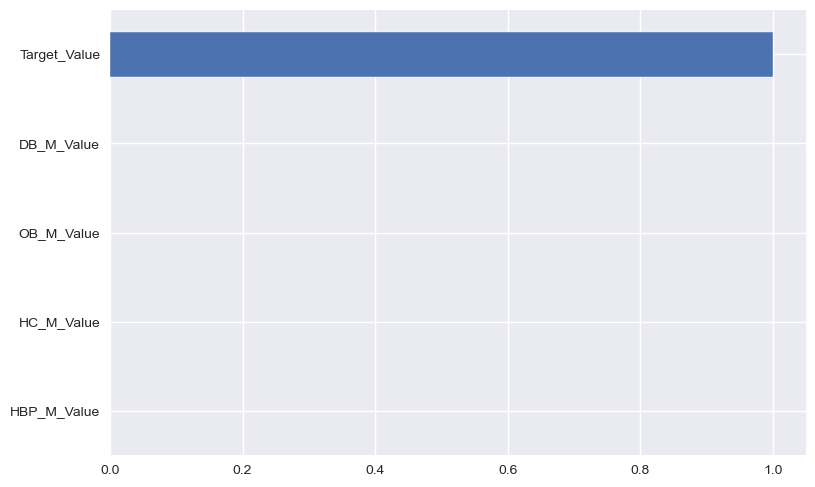

In [1392]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')